In [2]:
import numpy as np
import pandas as pd
import itertools as it
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import precision_score,confusion_matrix,recall_score
from scipy.io import loadmat
from sklearn.model_selection import train_test_split
from Orange.classification import tree
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

#from metrics import precision_score

In [3]:
Data = pd.read_excel('Data.xlsx')
Data = Data.set_index('Date')
df1 = Data.dropna(axis=0,how='any')
Y = df1['Class']
X = df1.drop('Class', axis = 1)
df1.groupby('Class').size()

Class
-1    1111
 0    2001
 1     963
dtype: int64

In [4]:
# Binarize the output
y = label_binarize(Y, classes=[-1, 0, 1])
n_classes = y.shape[1]

In [31]:
from sklearn.svm import SVC
classifier = SVC(kernel="poly")
classifier.fit(X,np.ravel(Y))

C:\Users\lmosquera\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='poly', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,random_state=109) # g0% training and 40% test

In [32]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='poly') # Linear Kernel


In [33]:
classifier = OneVsRestClassifier(svm.SVC(kernel='poly', probability=True))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

C:\Users\lmosquera\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\lmosquera\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\lmosquera\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarn

In [34]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

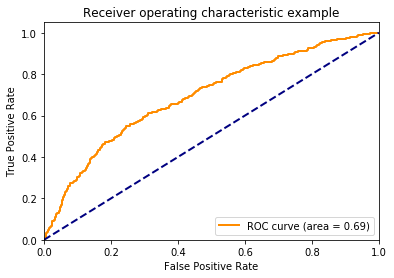

In [35]:
plt.figure()
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [78]:
from sklearn.naive_bayes import MultinomialNB
clf= MultinomialNB()
clf.fit(X_train, y_train)

score = clf.score(X_test, y_test)
print("score of Naive Bayes algo is :" , score)

y_pred = clf.predict(X_test)

ValueError: bad input shape (2445, 3)

In [63]:
print(confusion_matrix(y_test,y_pred))
print("Precision Score : ",precision_score(y_test,y_pred,average=None))
print("Recall Score :" , recall_score(y_test, y_pred, average=None) )

[[116 250 100]
 [125 556 101]
 [106 193  83]]
Precision Score :  [0.33429395 0.55655656 0.29225352]
Recall Score : [0.24892704 0.71099744 0.21727749]


In [64]:
print("Precision Score : ",precision_score(y_test,y_pred,average='micro')) #will return the total ratio of tp/(tp + fp)
print("Recall Score :" , recall_score(y_test, y_pred, average='micro') )

Precision Score :  0.46319018404907975
Recall Score : 0.46319018404907975


In [65]:
Epsilon = 0.2
delta = 0.1

In [79]:
from sklearn.multiclass import OneVsRestClassifier
# Learn to predict each class against the other
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

### $\eta$ minimo estimado

In [14]:
n_est = int(np.ceil((1/Epsilon)*(np.log(h_aprox) + np.log(1/delta))))
X1_tr, X1_ts, Y1_tr, Y1_ts = train_test_split(X, Y, train_size = n_est/X.shape[0], random_state=123)

# AQUI EL ALGORITMO USANDO X1

### $\eta$ minimo optimo

In [15]:
n_opt = int(np.ceil((1/Epsilon)*(np.log(dimVC) + np.log(1/delta))))
X2_tr, X2_ts, Y2_tr, Y2_ts = train_test_split(X, Y, train_size = n_opt/X.shape[0], random_state=123)

# AQUI EL ALGORITMO USANDO X2